In [1]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [5]:
(attributes_train, labels_train), (attributes_test, labels_test) = fashion_mnist.load_data()

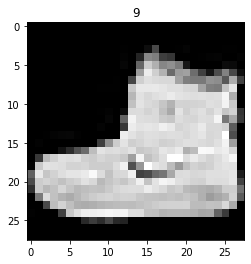

In [7]:
plt.imshow(attributes_train[0], cmap = "gray")
plt.title(labels_train[0])
plt.show()

In [8]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

In [15]:
input_shape = attributes_train[0].shape

In [9]:
set(labels_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
num_labels = len(set(labels_train))

In [29]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [50]:
tf.keras.backend.clear_session()

In [71]:
model = Sequential([
    Input(shape = input_shape),
    Flatten(),
    Dense(units = 128, activation = tf.keras.activations.relu),
    Dropout(0.25),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    Dense(units = 32, activation = "relu"),
    Dense(units = 10, activation = "softmax")    
])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [36]:
model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = Adam(),
    metrics = ["accuracy"])

In [46]:
model.fit(attributes_train, labels_train, epochs = 10, batch_size = 8, callbacks = [TensorBoard()])

Epoch 1/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.3447 - accuracy: 0.8757
Epoch 2/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.3386 - accuracy: 0.8788
Epoch 3/10
7500/7500 [==============================] - 19s 3ms/step - loss: 0.3333 - accuracy: 0.8807
Epoch 4/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3326 - accuracy: 0.8814
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.3284 - accuracy: 0.8835
Epoch 6/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3249 - accuracy: 0.8841
Epoch 7/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3231 - accuracy: 0.8845
Epoch 8/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3184 - accuracy: 0.8854
Epoch 9/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3164 - accuracy: 0.8860
Epoch 10/10
7500/7500 [==============================] - 15s 2ms/step - l

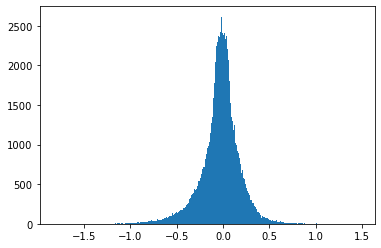

In [45]:
plt.hist(model.layers[1].kernel.numpy().ravel(), bins = "fd")
plt.show()

In [53]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [54]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>

In [55]:
model.layers[4]

NN Explanation

In [58]:
activation_demo_model = Model(inputs = [model.input], outputs = model.layers[4].output)

In [61]:
activation_4_layer = activation_demo_model.predict(attributes_train[:10])

In [62]:
activation_4_layer[0]

array([0.18138194, 0.2609607 , 1.0520877 , 0.8615298 , 0.25893214,
       0.        , 0.232349  , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.45265043, 0.        , 0.10962547, 0.        , 0.07318195,
       0.5226433 , 0.        , 0.        , 0.        , 0.35686943,
       0.        , 0.        , 0.399851  , 0.        , 0.8006954 ,
       0.6003577 , 0.        , 0.        , 0.08287482, 0.4679935 ,
       0.92439586, 0.        , 0.16866118, 1.4489017 , 0.        ,
       0.10594729, 0.38484374, 0.        , 0.04915964, 1.0431927 ,
       0.5500558 , 0.2502258 , 0.58821744, 0.44687298, 0.        ,
       0.        , 0.21310388, 0.        , 0.36283475, 0.66700363,
       1.0092293 , 0.11324108, 0.        , 0.        , 0.10835764,
       0.27815142, 1.2153777 , 0.00243264, 0.27041924], dtype=float32)

In [64]:
list(enumerate(activation_4_layer[0]))

[(0, 0.18138194),
 (1, 0.2609607),
 (2, 1.0520877),
 (3, 0.8615298),
 (4, 0.25893214),
 (5, 0.0),
 (6, 0.232349),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.45265043),
 (16, 0.0),
 (17, 0.10962547),
 (18, 0.0),
 (19, 0.07318195),
 (20, 0.5226433),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.35686943),
 (25, 0.0),
 (26, 0.0),
 (27, 0.399851),
 (28, 0.0),
 (29, 0.8006954),
 (30, 0.6003577),
 (31, 0.0),
 (32, 0.0),
 (33, 0.08287482),
 (34, 0.4679935),
 (35, 0.92439586),
 (36, 0.0),
 (37, 0.16866118),
 (38, 1.4489017),
 (39, 0.0),
 (40, 0.105947286),
 (41, 0.38484374),
 (42, 0.0),
 (43, 0.04915964),
 (44, 1.0431927),
 (45, 0.5500558),
 (46, 0.2502258),
 (47, 0.58821744),
 (48, 0.44687298),
 (49, 0.0),
 (50, 0.0),
 (51, 0.21310388),
 (52, 0.0),
 (53, 0.36283475),
 (54, 0.66700363),
 (55, 1.0092293),
 (56, 0.113241084),
 (57, 0.0),
 (58, 0.0),
 (59, 0.10835764),
 (60, 0.27815142),
 (61, 1.2153777),
 (62, 0.002432638),
 (63, 0.27041924

In [65]:
sorted(activation_4_layer[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002432638,
 0.04915964,
 0.07318195,
 0.08287482,
 0.105947286,
 0.10835764,
 0.10962547,
 0.113241084,
 0.16866118,
 0.18138194,
 0.21310388,
 0.232349,
 0.2502258,
 0.25893214,
 0.2609607,
 0.27041924,
 0.27815142,
 0.35686943,
 0.36283475,
 0.38484374,
 0.399851,
 0.44687298,
 0.45265043,
 0.4679935,
 0.5226433,
 0.5500558,
 0.58821744,
 0.6003577,
 0.66700363,
 0.8006954,
 0.8615298,
 0.92439586,
 1.0092293,
 1.0431927,
 1.0520877,
 1.2153777,
 1.4489017]

In [66]:
activation_4_layer[:, 45]

array([0.5500558 , 0.23242737, 0.        , 0.        , 0.        ,
       0.1038956 , 0.2012135 , 0.40100962, 0.1128299 , 0.        ],
      dtype=float32)

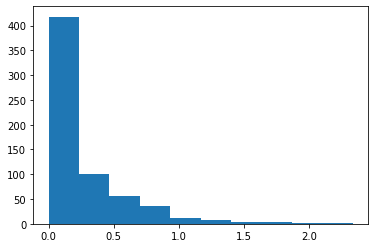

In [69]:
plt.hist(activation_4_layer.ravel())
plt.show()